In [601]:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Expanded_data_with_more_features.csv")

dataset['MathScore']=dataset['MathScore'].replace(100, 800000.0)

X =dataset.iloc[:,1:].values



In [3]:
print(dataset.isnull().any(),"\n")
n=0
for i in dataset.dtypes:
    print(str(n) +"      "+ str(i) )
    n+=1


Unnamed: 0             False
Gender                 False
EthnicGroup             True
ParentEduc              True
LunchType              False
TestPrep                True
ParentMaritalStatus     True
PracticeSport           True
IsFirstChild            True
NrSiblings              True
TransportMeans          True
WklyStudyHours          True
MathScore              False
ReadingScore           False
WritingScore           False
dtype: bool 

0      int64
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      float64
10      object
11      object
12      int64
13      int64
14      int64


In [4]:
from sklearn.impute import SimpleImputer
numImputer = SimpleImputer(missing_values=np.nan,strategy='mean')
numImputer.fit(X[:,8:9])
X[:,8:9] = numImputer.transform(X[:,8:9])
numImputer.fit(X[:,11:14])
X[:,11:14] = numImputer.transform(X[:,11:14])
df=pd.DataFrame(X)
print(dataset.isnull().any(),"\n")
df.isnull().any()

Unnamed: 0             False
Gender                 False
EthnicGroup             True
ParentEduc              True
LunchType              False
TestPrep                True
ParentMaritalStatus     True
PracticeSport           True
IsFirstChild            True
NrSiblings              True
TransportMeans          True
WklyStudyHours          True
MathScore              False
ReadingScore           False
WritingScore           False
dtype: bool 



0     False
1      True
2      True
3     False
4      True
5      True
6      True
7      True
8     False
9      True
10     True
11    False
12    False
13    False
dtype: bool

In [5]:
stringImputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
stringImputer.fit(X[:,0:8])
X[:,0:8] = stringImputer.transform(X[:,0:8])
stringImputer.fit(X[:,9:11])
X[:,9:11] = stringImputer.transform(X[:,9:11])
df=pd.DataFrame(X)
print(dataset.isnull().any(),"\n")
df.isnull().any()

Unnamed: 0             False
Gender                 False
EthnicGroup             True
ParentEduc              True
LunchType              False
TestPrep                True
ParentMaritalStatus     True
PracticeSport           True
IsFirstChild            True
NrSiblings              True
TransportMeans          True
WklyStudyHours          True
MathScore              False
ReadingScore           False
WritingScore           False
dtype: bool 



0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
dtype: bool

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encdoer',OneHotEncoder(),[0,1,2,3,4,5,6,9,10])],remainder='passthrough')
X=np.array(ct.fit_transform(X))
newDataset=pd.DataFrame(X)
print(newDataset.isnull().any(),"\n")
newDataset.head(5)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
dtype: bool 



,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,yes,3.0,71.0,71.0,74.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,yes,0.0,69.0,90.0,88.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,yes,4.0,87.0,93.0,91.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,no,1.0,45.0,56.0,42.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,yes,0.0,76.0,78.0,75.0


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
newDataset[29]=le.fit_transform(newDataset[29])
newDataset.head(6)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1,3.0,71.0,71.0,74.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1,0.0,69.0,90.0,88.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1,4.0,87.0,93.0,91.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0,1.0,45.0,56.0,42.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1,0.0,76.0,78.0,75.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1,1.0,73.0,84.0,79.0


In [8]:
X=newDataset.iloc[:,:].values
X=np.delete(X,29,axis=1)
Y=newDataset.iloc[:,29].values
# print(X[0,:])
# print(X.shape)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [10]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
KNClassifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
KNClassifier.fit(X_train,Y_train)
KNY_pred=KNClassifier.predict(X_test)
print(np.concatenate((KNY_pred.reshape(len(KNY_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[0 1]
 [1 0]
 [1 1]
 ...
 [0 0]
 [0 1]
 [1 1]]


In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
KNcm = confusion_matrix(Y_test,KNY_pred)
print(KNcm)
print(str(accuracy_score(Y_test,KNY_pred)*100)+"%")

[[ 713 1989]
 [1181 3778]]
58.62158987077405%


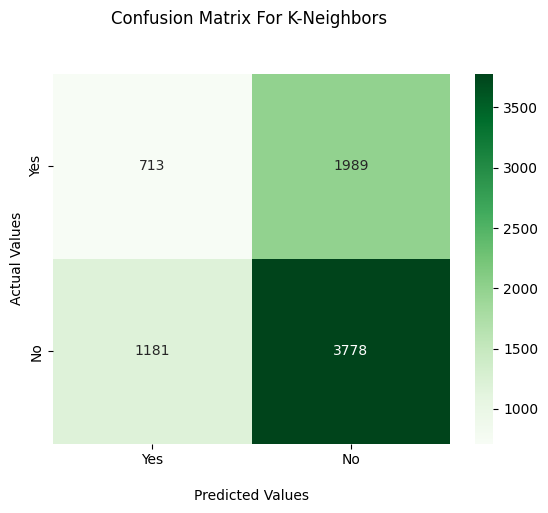

In [13]:
import seaborn as sns

ax = sns.heatmap(KNcm,annot=True,cmap="Greens",fmt='d')
ax.set_title('Confusion Matrix For K-Neighbors \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])

plt.show()

In [14]:
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(X_train,Y_train)
NBY_pred=NBClassifier.predict(X_test)
print(np.concatenate((NBY_pred.reshape(len(NBY_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [1 0]
 [1 1]
 [1 1]]


In [15]:
NBcm=confusion_matrix(Y_test,NBY_pred)
print(NBcm)
print(str(accuracy_score(Y_test,NBY_pred)*100)+"%")

[[  54 2648]
 [  76 4883]]
64.44328416655789%


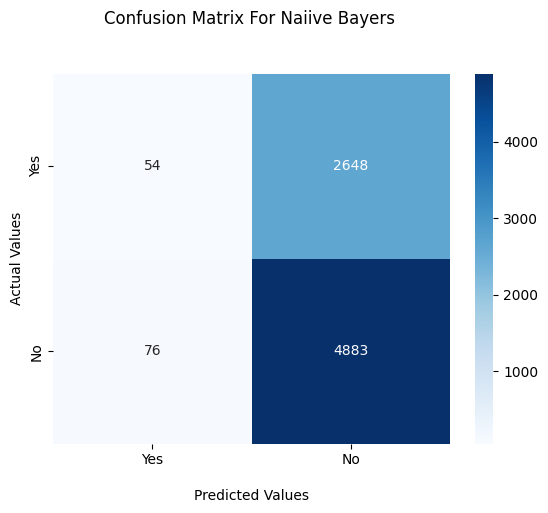

In [16]:
ax = sns.heatmap(NBcm,annot=True,cmap="Blues",fmt='d')
ax.set_title('Confusion Matrix For Naiive Bayers \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])

plt.show()